In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

import numpy as np

from art.metrics import PDTP, SHAPr
from art.utils import load_nursery

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from art.estimators.classification.scikitlearn import ScikitlearnRandomForestClassifier, ScikitlearnDecisionTreeClassifier

(x_train, y_train), (x_test, y_test), _, _ = load_nursery(test_set=0.8)

model = RandomForestClassifier()
model.fit(x_train, y_train)
extra_model = RandomForestClassifier()

art_classifier = ScikitlearnRandomForestClassifier(model)
extra_classifier = ScikitlearnRandomForestClassifier(extra_model)

num_samples = 100

In [2]:
indexes = np.array(range(num_samples))
leakage = PDTP(art_classifier, extra_classifier, x_train, y_train, indexes=indexes)

print("Average PDTP leakage random forest: ", np.average(leakage))
print("Max PDTP leakage random forest: ", np.max(leakage))

Average PDTP leakage random forest:  1.2732808774212567
Max PDTP leakage random forest:  1.7871883971684845


In [3]:
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
extra_model2 = DecisionTreeClassifier()

art_classifier2 = ScikitlearnDecisionTreeClassifier(model2)
extra_classifier2 = ScikitlearnDecisionTreeClassifier(extra_model2)

In [4]:
leakage2 = PDTP(art_classifier2, extra_classifier2, x_train, y_train, indexes=indexes, num_iter=1)
print("Average PDTP leakage decision tree: ", np.average(leakage2))
print("Max PDTP leakage decision tree: ", np.max(leakage2))

Average PDTP leakage decision tree:  1.1371428571428572
Max PDTP leakage decision tree:  2.7142857142857144


In [5]:
SHAPr_leakage = SHAPr(art_classifier, x_train, y_train, x_test, y_test)
print("Average SHAPr leakage random forest: ", np.average(SHAPr_leakage))
print("Max SHAPr leakage random forest: ", np.max(SHAPr_leakage))

SHAPr_leakage2 = SHAPr(art_classifier2, x_train, y_train, x_test, y_test)

print("Average PDTP leakage decision tree: ", np.average(SHAPr_leakage2))
print("Max PDTP leakage decision tree: ", np.max(SHAPr_leakage2))

Average SHAPr leakage random forest:  0.06350663908967069
Max SHAPr leakage random forest:  0.06666666666666832
Average PDTP leakage decision tree:  0.1577371445891402
Max PDTP leakage decision tree:  0.16089717216613722


In [16]:
top = 10

SHAPr_leakage2_short = SHAPr_leakage2[:num_samples]
SHAPr_leakage_short = SHAPr_leakage[:num_samples]

highest_SHAPr_dt = np.argmax(SHAPr_leakage2_short)
highest_PDTP_dt = np.argmax(leakage2)
print('decision tree: max leakage ', highest_SHAPr_dt, highest_PDTP_dt)
top_SHAPr_dt = np.argpartition(SHAPr_leakage2_short, -top)[-top:]
top_PDTP_dt = np.argpartition(leakage2, -top)[-top:]
print('decision tree: top 10 leakage ', np.sort(top_SHAPr_dt), np.sort(top_PDTP_dt))

highest_SHAPr_rf = np.argmax(SHAPr_leakage_short)
highest_PDTP_rf = np.argmax(leakage)
print('random forest: max leakage ', highest_SHAPr_rf, highest_PDTP_rf)
top_SHAPr_rf = np.argpartition(SHAPr_leakage_short, -top)[-top:]
top_PDTP_rf = np.argpartition(leakage, -top)[-top:]
print('random forest: top 10 leakage ', np.sort(top_SHAPr_rf), np.sort(top_PDTP_rf))

highest_val_SHAPr_dt = np.max(SHAPr_leakage2_short)
highest_indexes_shap = np.argwhere(SHAPr_leakage2_short == highest_val_SHAPr_dt)
print(highest_indexes_shap)
highest_val_PDTP_dt = np.max(leakage2)
highest_indexes = np.argwhere(leakage2 == highest_val_PDTP_dt)
print(highest_indexes)

decision tree: max leakage  8 2
decision tree: top 10 leakage  [31 33 34 35 37 70 71 75 77 78] [ 2  6 32 33 38 52 63 64 74 76]
random forest: max leakage  8 52
random forest: top 10 leakage  [31 33 34 35 37 70 71 75 77 78] [ 4  6  9 32 38 52 63 74 76 95]
[[ 8]
 [14]
 [17]
 [19]
 [21]
 [25]
 [27]
 [31]
 [33]
 [34]
 [35]
 [37]
 [41]
 [44]
 [45]
 [46]
 [51]
 [58]
 [62]
 [65]
 [68]
 [70]
 [71]
 [75]
 [77]
 [78]
 [85]
 [90]
 [93]
 [96]
 [97]]
[[ 2]
 [ 6]
 [38]
 [52]
 [63]
 [64]
 [74]
 [76]]


<ipython-input-24-856bf38cbe31>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(20), SHAPr_leakage_short[:20], label="pdtp")


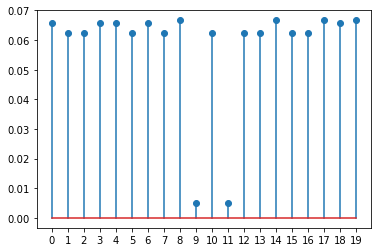

In [24]:
import matplotlib.pyplot as plt

plt.stem(range(20), SHAPr_leakage_short[:20], label="shap")
plt.xticks(range(20))
plt.show()

<ipython-input-26-7e92eecf8377>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(20), leakage[:20], label="shap")


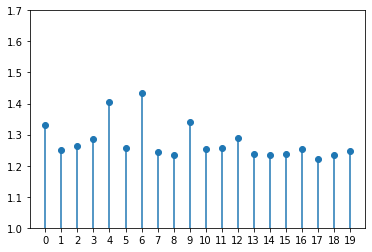

In [26]:
plt.stem(range(20), leakage[:20], label="pdtp")
plt.xticks(range(20))
plt.ylim(1, 1.7)
plt.show()

<ipython-input-32-96c6915764c1>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(20), SHAPr_leakage2_short[:20], label="pdtp")


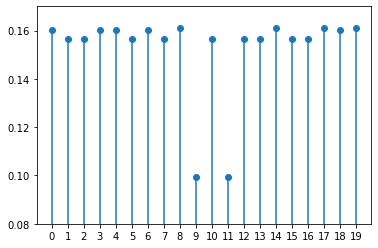

In [32]:
plt.stem(range(20), SHAPr_leakage2_short[:20], label="shap")
plt.xticks(range(20))
plt.ylim(0.08, 0.17)
plt.show()

<ipython-input-29-6a8e0657f77c>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(20), leakage2[:20], label="shap")


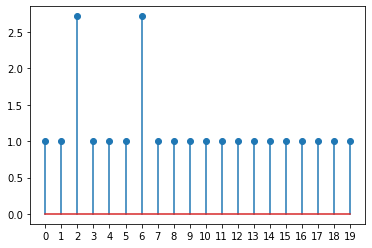

In [29]:
plt.stem(range(20), leakage2[:20], label="pdtp")
plt.xticks(range(20))
plt.ylim(0.5, 3)
plt.show()